Modules nécessaires : 

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [11]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-04 10:35:53,677 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-04 10:35:53,680 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-04 10:35:53,684 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-04 10:35:53,684 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-04 10:35:53,768 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-04 10:35:54,968 - HiggsML.datasets     - INFO     - Data loaded successfully


In [12]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [13]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [14]:
path.append(submission_dir)
from model import Model

Testing Settings

In [15]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [16]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [27]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('significance')
    plt.ylabel('epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Calcul AUC : 

In [ ]:
def AUC():
    

Significance

In [28]:

def optimization(train_data): 
    L_epochs = np.linspace(1, 7, 8)
    sigmax = 0
    epochs_max = 1
    S = []
    E = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.model.significance_2(test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"])
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        if sig1>sigmax: 
            sigmax = sig1
            epochs_max = int(L_epochs[k])
    graphique(S, E)
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

Lancement de la boucle

2025-06-04 11:00:37,015 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:00:37,015 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:00:37,419 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:37,439 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  681.0560923856815
sum_bkg_weights:  105037.94390761433


2025-06-04 11:00:37,822 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:37,843 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  659.3753892494998
sum_bkg_weights:  105059.62461075051


2025-06-04 11:00:38,236 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:38,297 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  661.0443575357664
sum_bkg_weights:  105057.95564246425
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
1
157/157 - 2s - 11ms/step - accuracy: 0.6122 - loss: 28.1578
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
score shape before threshold (4551,)
score shape after threshold (4551,)
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
saved_info {'beta': np.float64(19162.796805843645), 'gamma': np.float64(334.2946947841455), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000027868382700>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0000027868380FE0>}
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Results: 
	 mu_hat  :  -2.125462372628844
	 del_mu_stat  :  0.4176913009079833
	 del_mu_sys  :  0.0
	 del_mu_tot  :  0.4176913009079833
Holdou

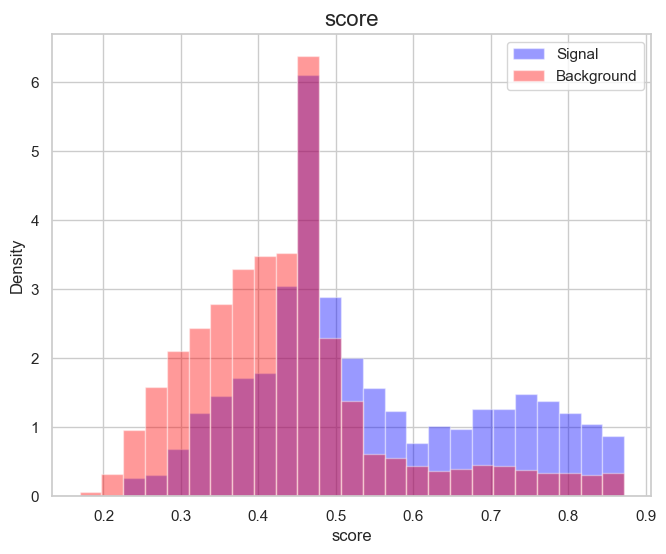

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


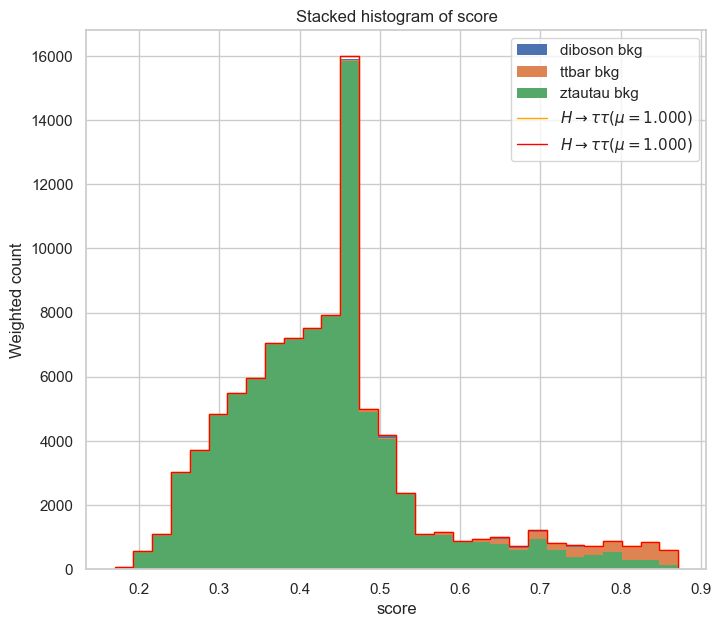

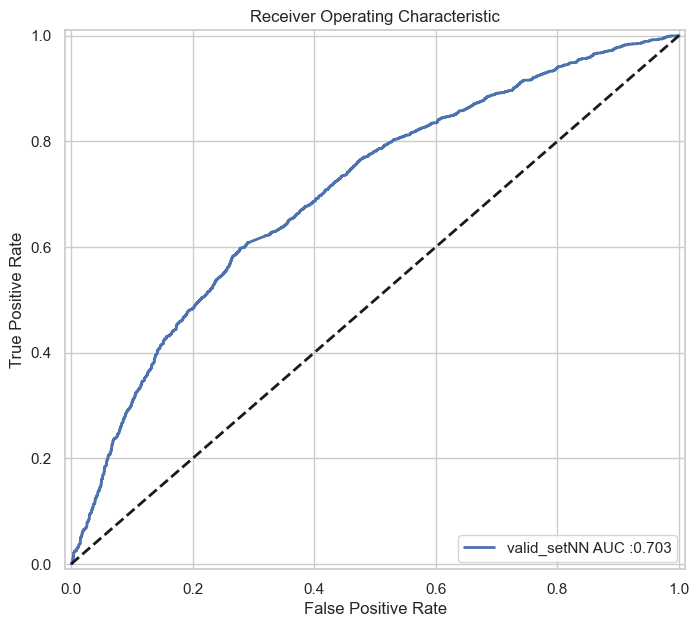

2025-06-04 11:00:43,970 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:00:43,985 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:00:44,368 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:44,385 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  697.5734148436595
sum_bkg_weights:  105021.42658515633


2025-06-04 11:00:44,768 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:44,792 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  633.9456483021157
sum_bkg_weights:  105085.05435169788


2025-06-04 11:00:45,191 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:45,258 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  670.8101543485186
sum_bkg_weights:  105048.18984565146
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
1
157/157 - 2s - 12ms/step - accuracy: 0.6452 - loss: 26.8464
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
score shape before threshold (4598,)
score shape after threshold (4598,)
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
saved_info {'beta': np.float64(19560.7551316461), 'gamma': np.float64(349.78546951010003), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000027866AEFCE0>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0000027866AEFB00>}
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Results: 
	 mu_hat  :  -3.5009704960942183
	 del_mu_stat  :  0.4034035925466612
	 del_mu_sys  :  0.0
	 del_mu_tot  :  0.4034035925466612
Holdou

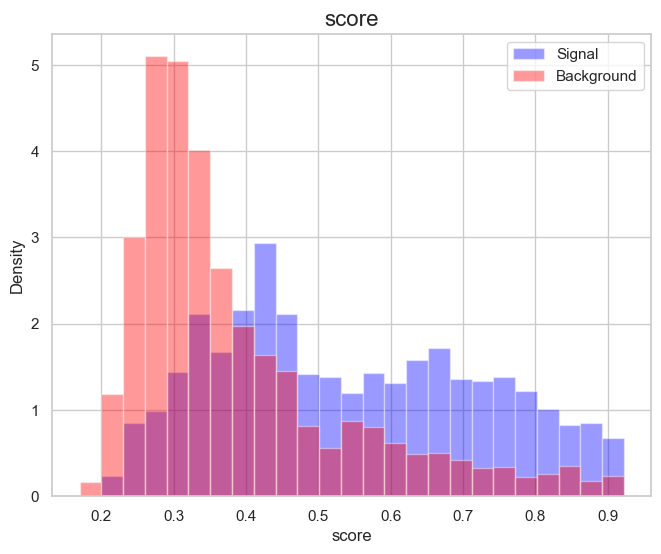

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


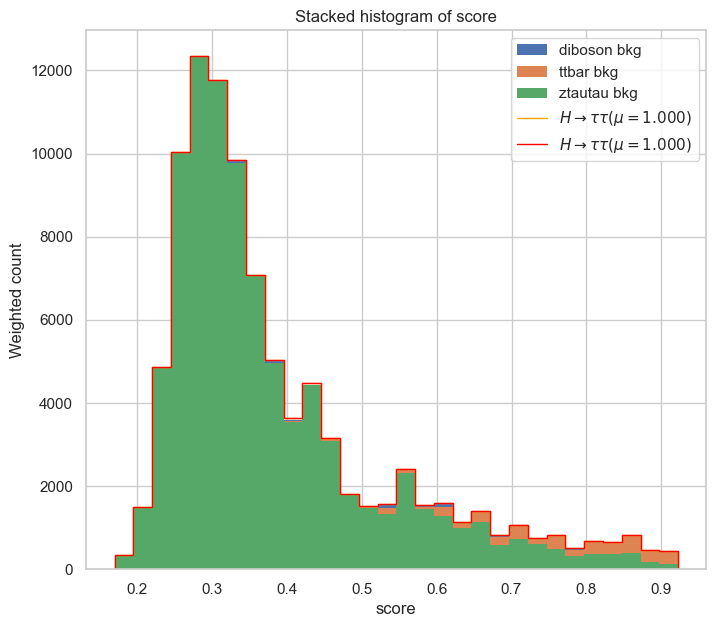

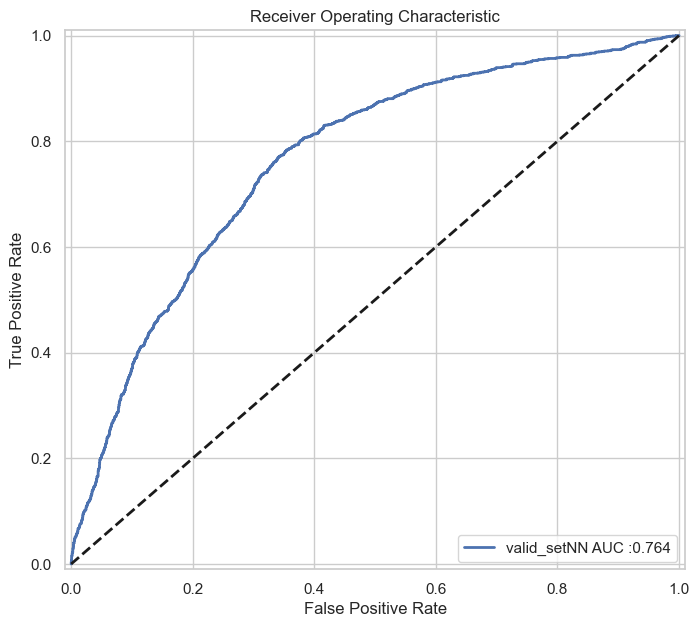

2025-06-04 11:00:51,279 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:00:51,279 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:00:51,647 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:51,665 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  681.66825197343
sum_bkg_weights:  105037.33174802654


2025-06-04 11:00:52,052 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:52,069 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  644.4154390170247
sum_bkg_weights:  105074.58456098298


2025-06-04 11:00:52,436 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:52,513 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  675.6428401196493
sum_bkg_weights:  105043.35715988037
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
2
Epoch 1/2
157/157 - 2s - 11ms/step - accuracy: 0.6722 - loss: 27.2868
Epoch 2/2
157/157 - 0s - 3ms/step - accuracy: 0.7106 - loss: 24.4193
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
score shape before threshold (4569,)
score shape after threshold (4569,)
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
saved_info {'beta': np.float64(24128.80491792257), 'gamma': np.float64(428.7080760586937), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000002786CF37A60>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x000002786CF37C40>}
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Results: 
	 mu_hat  :  -1.5725370147404647
	 del_mu_stat  :  0.3

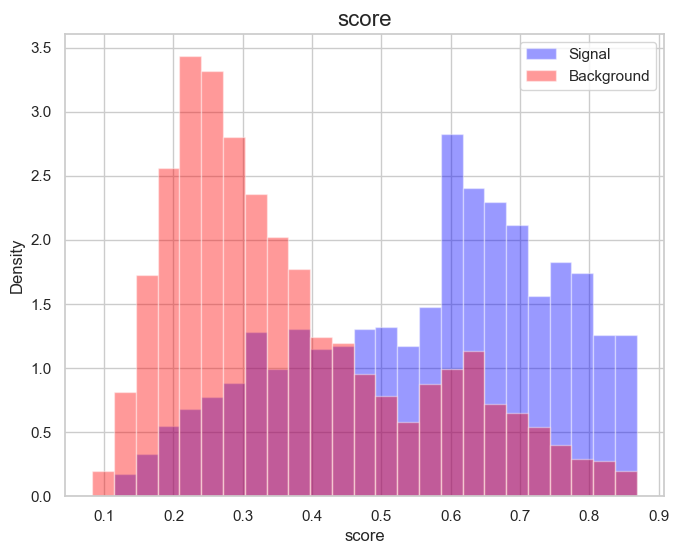

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


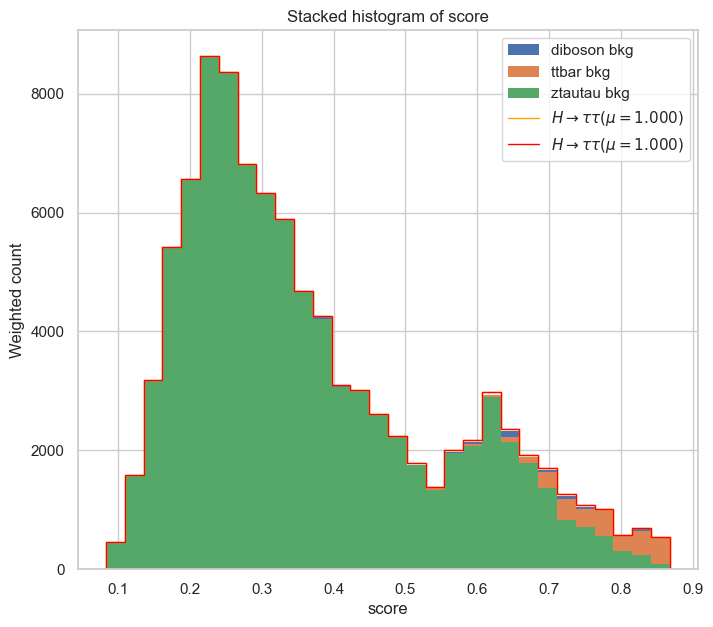

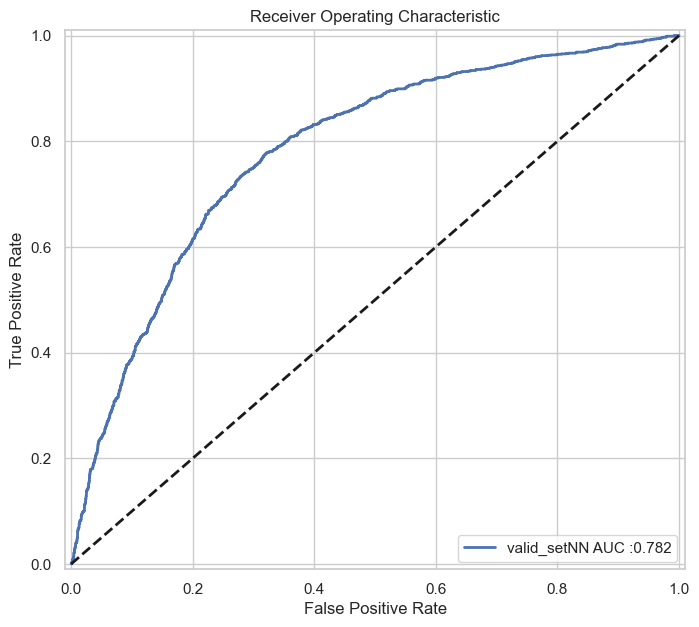

2025-06-04 11:00:59,061 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:00:59,061 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:00:59,453 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:59,472 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  669.5651923870528
sum_bkg_weights:  105049.43480761295


2025-06-04 11:00:59,839 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:00:59,858 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  659.3357392434947
sum_bkg_weights:  105059.66426075646


2025-06-04 11:01:00,304 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:00,364 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  672.4799794450907
sum_bkg_weights:  105046.52002055488
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
3
Epoch 1/3
157/157 - 2s - 11ms/step - accuracy: 0.6588 - loss: 28.8708
Epoch 2/3
157/157 - 0s - 3ms/step - accuracy: 0.7078 - loss: 24.8179
Epoch 3/3
157/157 - 0s - 2ms/step - accuracy: 0.7322 - loss: 23.4983
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
score shape before threshold (4614,)
score shape after threshold (4614,)
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
saved_info {'beta': np.float64(25828.080022600254), 'gamma': np.float64(492.0709531614438), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000027852487600>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0000027852485580>}
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


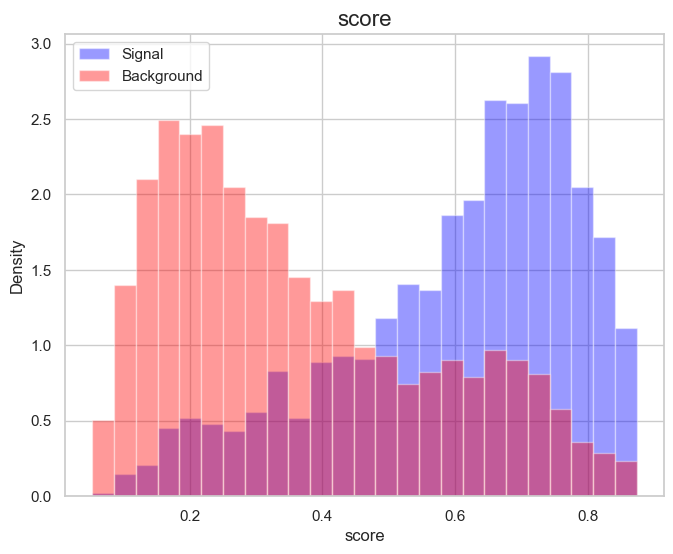

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


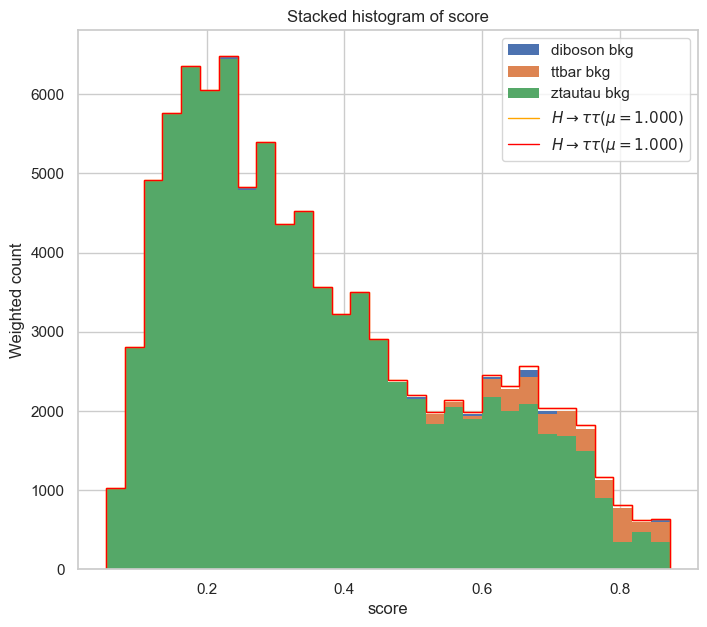

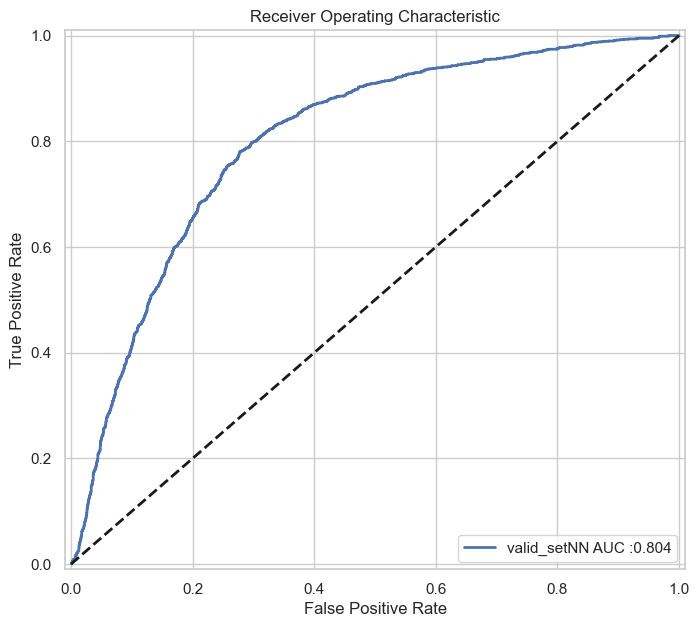

2025-06-04 11:01:06,707 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:01:06,707 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:01:07,070 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:07,097 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  672.5392505082971
sum_bkg_weights:  105046.46074949171


2025-06-04 11:01:07,498 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:07,521 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  677.9363851590645
sum_bkg_weights:  105041.06361484091


2025-06-04 11:01:07,983 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:08,054 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  651.0558110526034
sum_bkg_weights:  105067.94418894741
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
4
Epoch 1/4
157/157 - 2s - 12ms/step - accuracy: 0.6114 - loss: 27.7780
Epoch 2/4
157/157 - 0s - 3ms/step - accuracy: 0.7192 - loss: 25.4091
Epoch 3/4
157/157 - 1s - 4ms/step - accuracy: 0.7352 - loss: 23.8823
Epoch 4/4
157/157 - 0s - 3ms/step - accuracy: 0.7522 - loss: 22.8929
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
score shape before threshold (4551,)
score shape after threshold (4551,)
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
saved_info {'beta': np.float64(20371.88913847225), 'gamma': np.float64(436.92404305076764), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x00000278682791C0>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0000027868278A40>}
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━

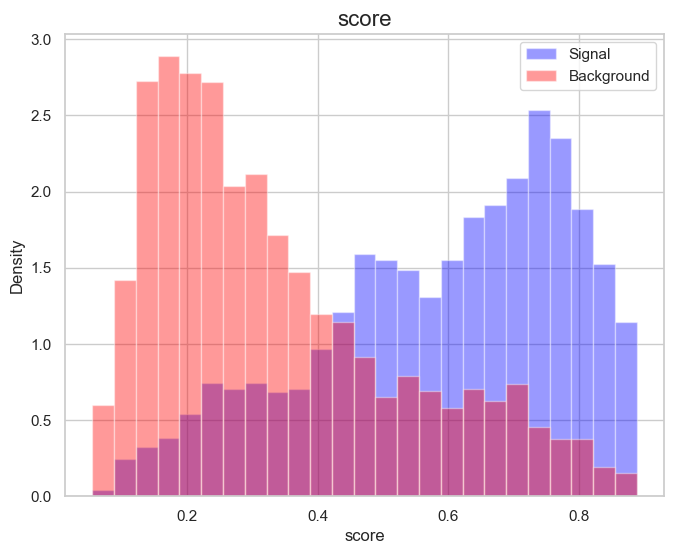

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


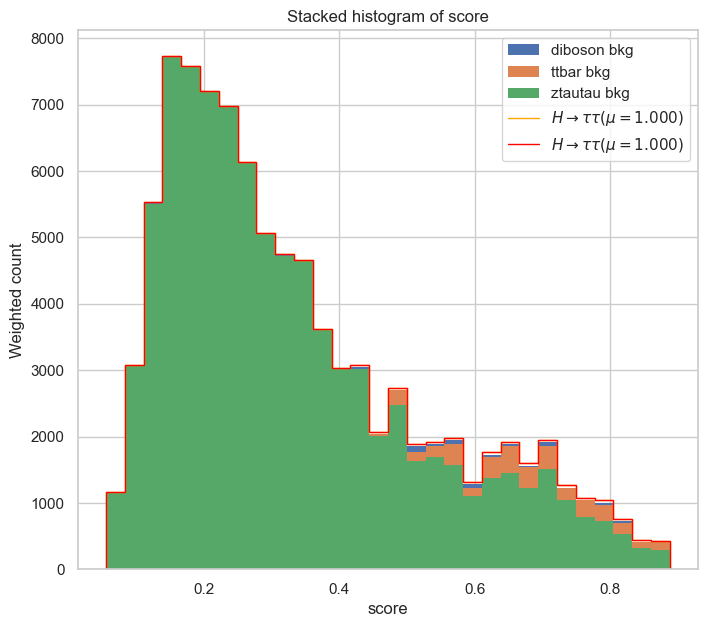

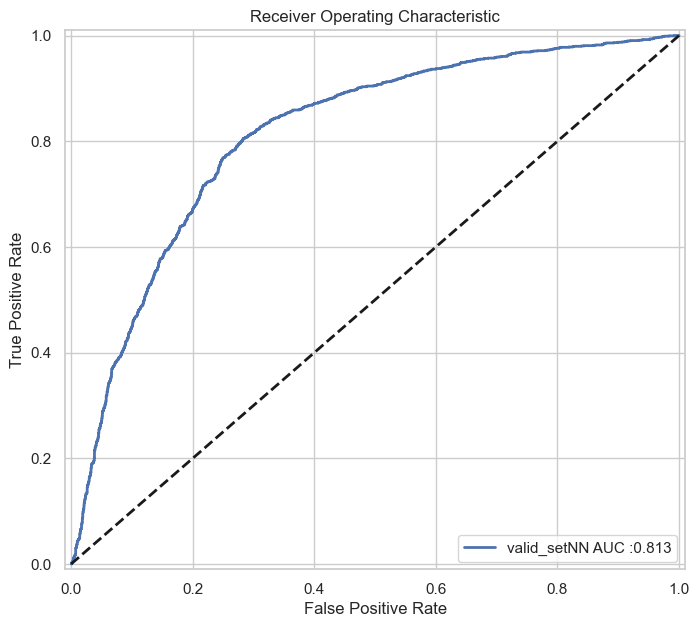

2025-06-04 11:01:15,303 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:01:15,308 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:01:15,665 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:15,682 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  674.9296365492556
sum_bkg_weights:  105044.07036345074


2025-06-04 11:01:16,041 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:16,058 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  641.5139825000996
sum_bkg_weights:  105077.4860174999


2025-06-04 11:01:16,404 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:16,480 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  685.4064026242313
sum_bkg_weights:  105033.59359737576
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
5
Epoch 1/5
157/157 - 2s - 10ms/step - accuracy: 0.5720 - loss: 28.4981
Epoch 2/5
157/157 - 0s - 2ms/step - accuracy: 0.6908 - loss: 25.8398
Epoch 3/5
157/157 - 0s - 3ms/step - accuracy: 0.7292 - loss: 24.2162
Epoch 4/5
157/157 - 1s - 4ms/step - accuracy: 0.7490 - loss: 23.0554
Epoch 5/5
157/157 - 0s - 2ms/step - accuracy: 0.7590 - loss: 22.3429
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
score shape before threshold (4574,)
score shape after threshold (4574,)
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
saved_info {'beta': np.float64(21968.94256499173), 'gamma': np.float64(507.54413619313254), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000027866A1FB00>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0000

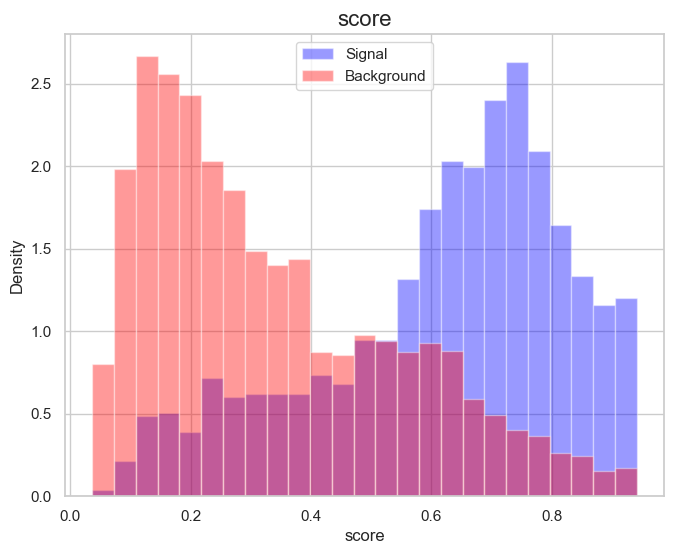

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


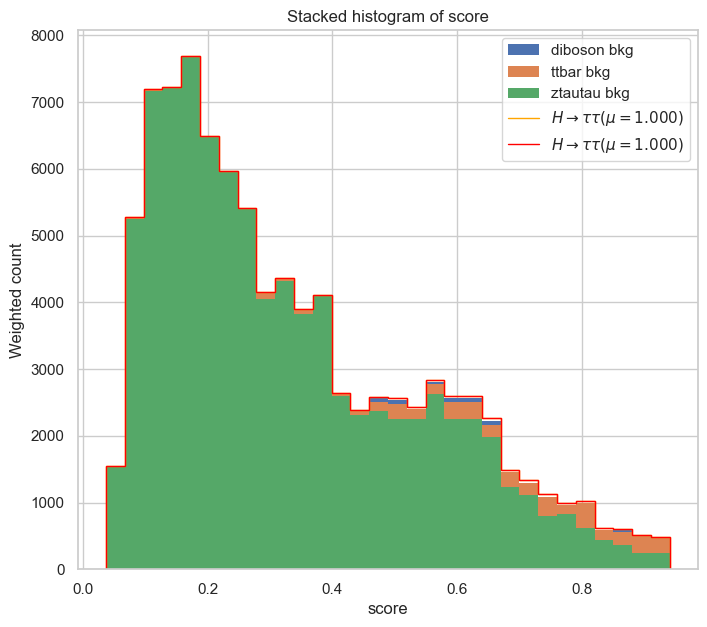

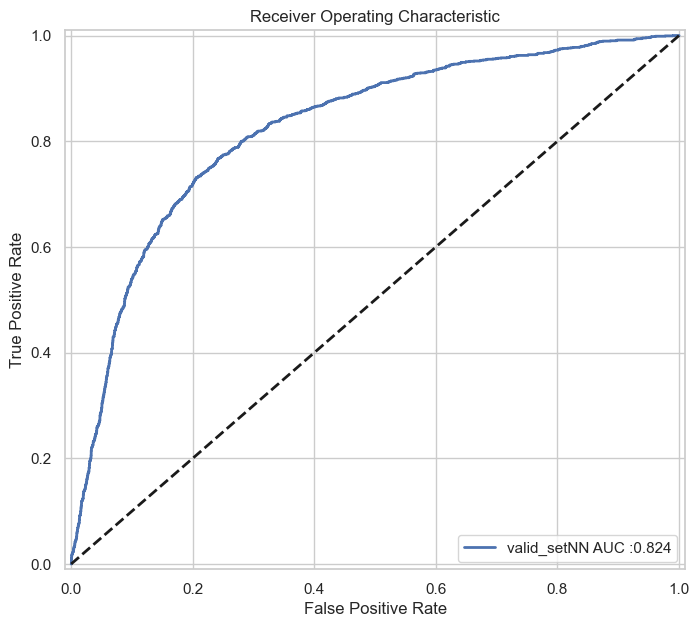

2025-06-04 11:01:23,987 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:01:23,990 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:01:24,397 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:24,415 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  671.2509265469266
sum_bkg_weights:  105047.74907345304


2025-06-04 11:01:24,820 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:24,844 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  662.3695126103287
sum_bkg_weights:  105056.63048738969


2025-06-04 11:01:25,305 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:25,383 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  667.7334428055194
sum_bkg_weights:  105051.26655719444
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
6
Epoch 1/6
157/157 - 2s - 13ms/step - accuracy: 0.6878 - loss: 27.3209
Epoch 2/6
157/157 - 0s - 3ms/step - accuracy: 0.7202 - loss: 24.4948
Epoch 3/6
157/157 - 0s - 3ms/step - accuracy: 0.7358 - loss: 23.1964
Epoch 4/6
157/157 - 1s - 4ms/step - accuracy: 0.7410 - loss: 22.4271
Epoch 5/6
157/157 - 0s - 3ms/step - accuracy: 0.7502 - loss: 21.9166
Epoch 6/6
157/157 - 0s - 3ms/step - accuracy: 0.7540 - loss: 21.5890
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
score shape before threshold (4592,)
score shape after threshold (4592,)
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
saved_info {'beta': np.float64(27449.97649628941), 'gamma': np.float64(519.8996699599621), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000002786B597F

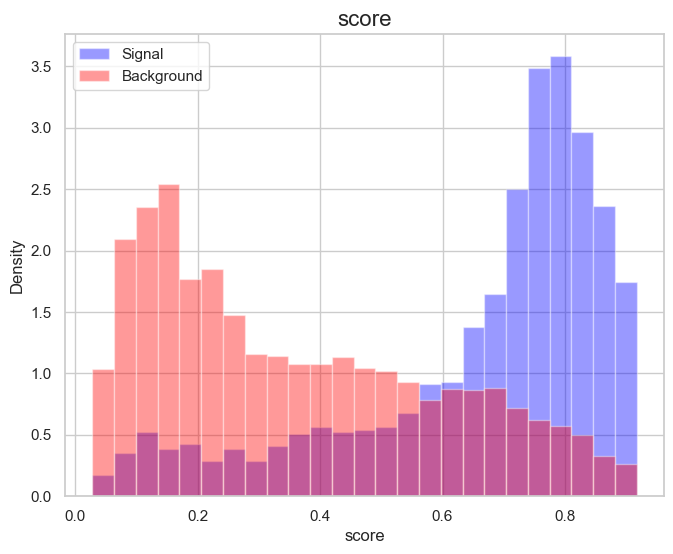

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


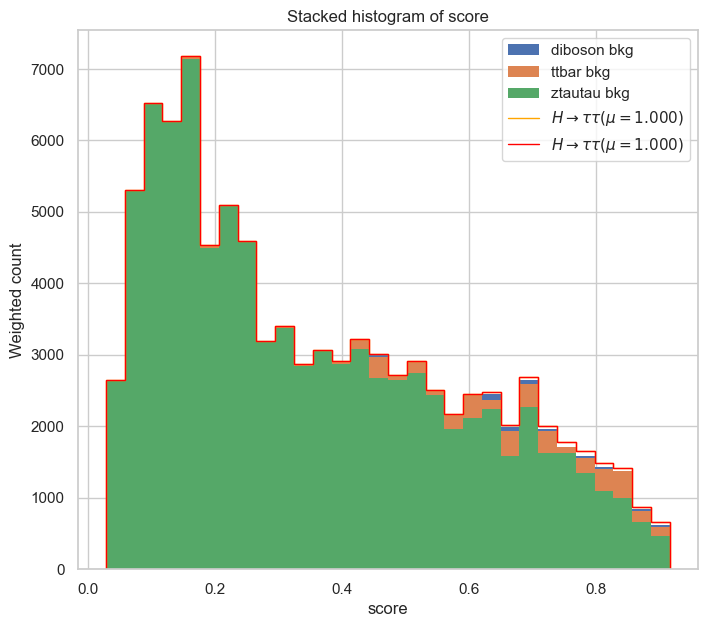

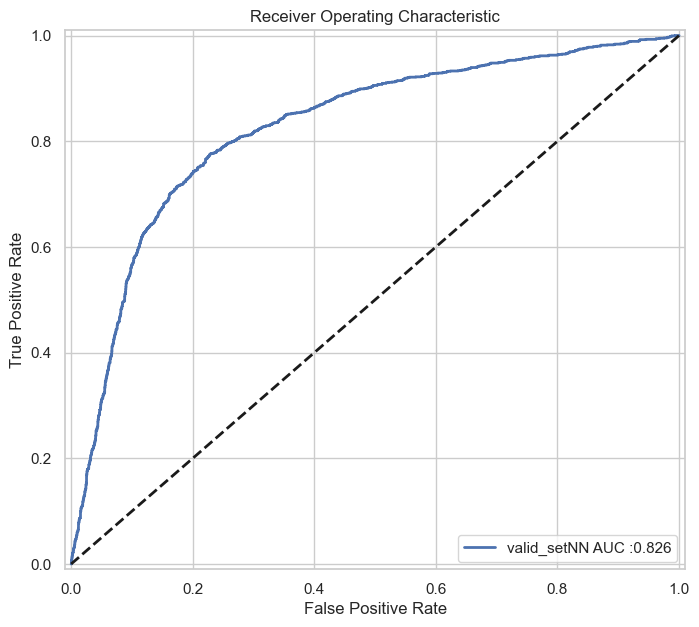

2025-06-04 11:01:33,326 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:01:33,326 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:01:33,718 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:33,736 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  692.6822463190497
sum_bkg_weights:  105026.31775368092


2025-06-04 11:01:34,176 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:34,195 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  625.2800619970715
sum_bkg_weights:  105093.71993800293


2025-06-04 11:01:34,577 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:34,641 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  684.7005591099025
sum_bkg_weights:  105034.29944089006
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'NN'
 Model is NN
7
Epoch 1/7
157/157 - 2s - 13ms/step - accuracy: 0.7088 - loss: 26.1929
Epoch 2/7
157/157 - 0s - 3ms/step - accuracy: 0.7468 - loss: 23.6498
Epoch 3/7
157/157 - 0s - 3ms/step - accuracy: 0.7504 - loss: 22.6774
Epoch 4/7
157/157 - 0s - 2ms/step - accuracy: 0.7566 - loss: 21.9656
Epoch 5/7
157/157 - 0s - 2ms/step - accuracy: 0.7632 - loss: 21.4654
Epoch 6/7
157/157 - 0s - 2ms/step - accuracy: 0.7714 - loss: 21.0549
Epoch 7/7
157/157 - 0s - 3ms/step - accuracy: 0.7778 - loss: 20.6762
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
score shape before threshold (4570,)
score shape after threshold (4570,)
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
saved_info {'beta': np.float64(21495.47764944325), 'gamma': np.float64(508.08606642875606), 'te

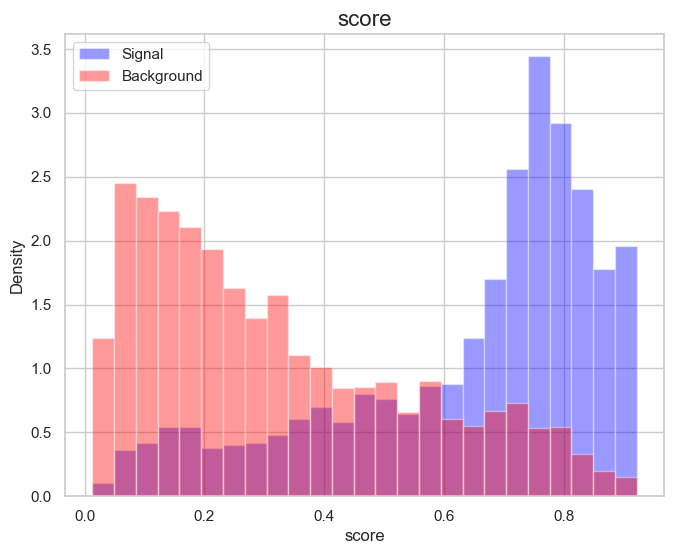

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


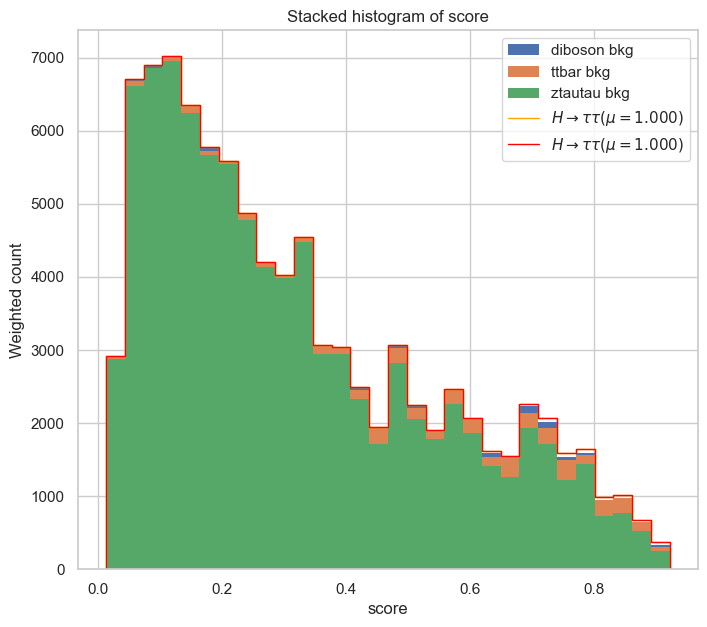

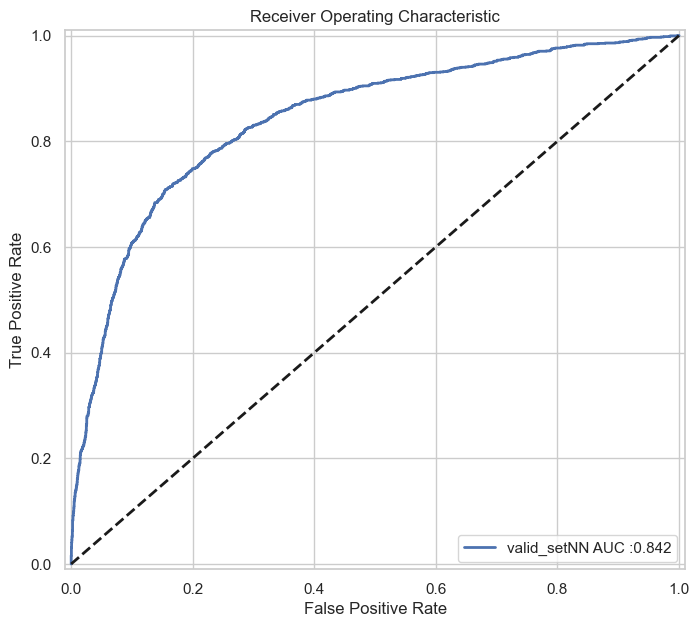

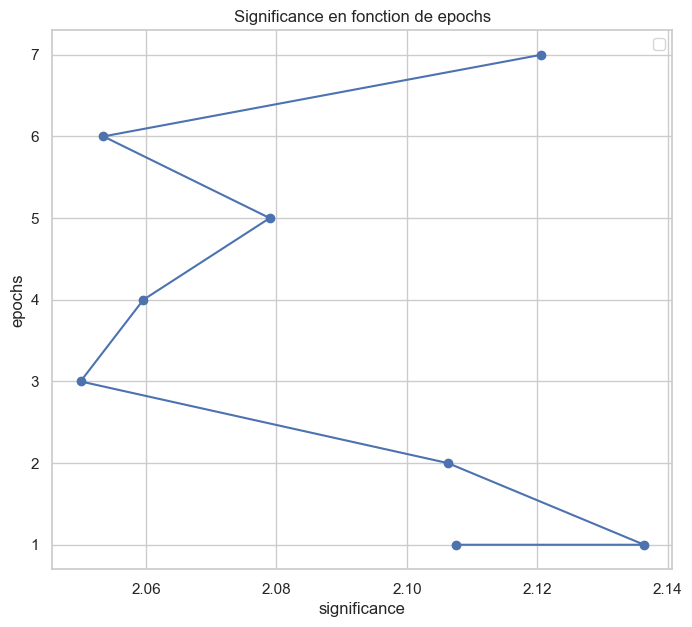

(np.float64(2.136378376121326), 1)

In [29]:
optimization(data_set)